In [3]:
#import packages
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns, pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from collections import Counter
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf


In [4]:
#import file and create dataset
data = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [5]:
#show dataset
print(data)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

In [6]:
#retrieve records and data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
#check for null values and summarize finddings
data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [8]:
#drop irrelevants columns

datanew = data.drop(columns=['Area', 'Marital', 'Gender','Churn','Job','CaseOrder', 'Customer_id', 'Interaction','UID','County', 
                             'Zip', 'Lat', 'Lng', 'Population', 'TimeZone','Techie','Tablet',
                             'TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod',
                             'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6','InternetService', 'Item7', 'Item8',
                             'Outage_sec_perweek','Email','Contacts', 'Port_modem',
                             'Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV', 'StreamingMovies','City', 'State'])

In [9]:
#check dataset
datanew.head()

,Children,Age,Income,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,1,6.795513,172.455519,904.536110
1,1,27,21704.77,1,1.156681,242.632554,800.982766
2,4,50,9609.57,1,15.754144,159.947583,2054.706961
3,1,48,18925.23,0,17.087227,119.956840,2164.579412
4,0,83,40074.19,1,1.670972,149.948316,271.493436


In [10]:
#retrieve statistics of current columns
datanew.describe()

,Children,Age,Income,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,6.000000,71.999280,290.160419,7158.981530


In [11]:
#save the new dataset
datanew.to_csv ('Churn_DataNew.csv', index = False, header=True)

In [12]:
#kMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(datanew)

KMeans(n_clusters=2, random_state=0)

In [13]:
#retrieve centroids of KMeans cluster
kmeans.cluster_centers_

array([[2.12604722e+00, 5.32254379e+01, 7.76959584e+04, 4.02513328e-01,
        3.43415579e+01, 1.72686931e+02, 3.38331035e+03],
       [2.07404394e+00, 5.30260374e+01, 2.63140332e+04, 3.96392731e-01,
        3.45919379e+01, 1.72602696e+02, 3.39555770e+03]])

In [14]:
#calculate the first model's inertia
kmeans.inertia_

2887000084405.034

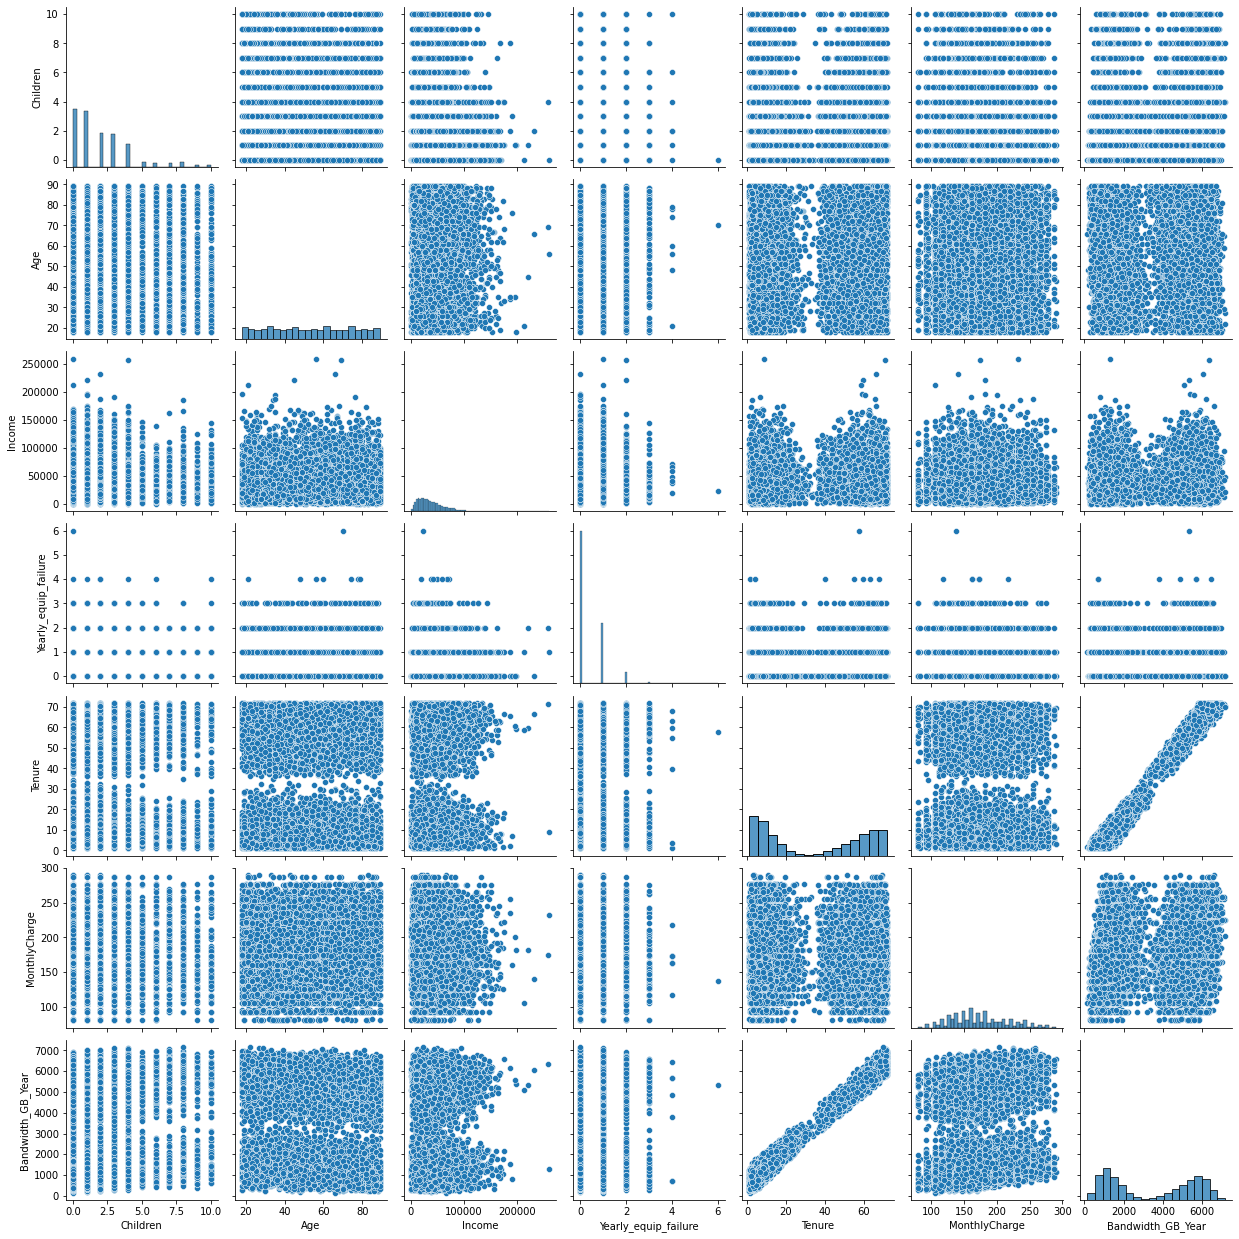

In [15]:
#sns.pairplot(datanew[0:100])
sns.pairplot(datanew)

In [16]:
values = datanew[['MonthlyCharge', 'Age']]
values= values[0:1000]

wcss_datanew = [] 
for i in range(1, 11): 
    kmeans3 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans3.fit(values) 
    wcss_datanew.append(kmeans3.inertia_)

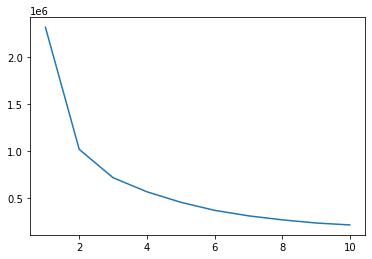

In [17]:
#elbow method
clusters_datanew = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_datanew, wcss_datanew)

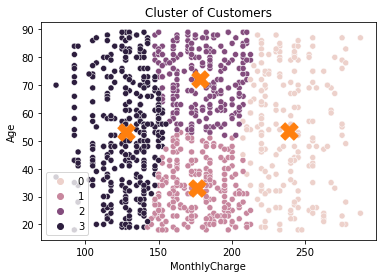

In [53]:
#fit data to second kmeans model and create scatterplot with centroids
kmeans_datanew = KMeans(n_clusters=4, random_state=42)
kmeans_datanew.fit(values)
cent = kmeans_datanew.cluster_centers_
sns.scatterplot(x = values['MonthlyCharge'], y = values['Age'], hue=kmeans_datanew.labels_)
plt.scatter (cent[:,0], cent[:,1], s=300, marker='X', label = 'Centroids')
plt.title('Cluster of Customers')
plt.show()


In [54]:
#show x and y values for centroids
print(cent)

[[238.95264734  53.50246305]
 [176.42461129  33.16182573]
 [178.27755898  72.07894737]
 [127.41942102  53.22560976]]


In [51]:
#second model's inertia
kmeans_datanew.inertia_

569750.7284775297

In [55]:
#Retrieve size of each cluster
from collections import Counter
Counter(labels)

Counter({2: 228, 0: 203, 1: 241, 3: 328})

In [24]:
#check the accuracy and quality of the second model's labeled data.
labels = kmeans_datanew.labels_
correctlabels = sum(labels)
print("Result: %d out of %d samples were correctly labeled." % (correctlabels, values.size))
print ('Accuracy score: {0:0.2f}'.format(correctlabels/float(values.size)))

Result: 1681 out of 2000 samples were correctly labeled.
Accuracy score: 0.84
